# Recalage d'images : alignement et mesure de superposition

Le **recalage d'images** (ou *image registration*) est un processus essentiel en imagerie qui vise à aligner deux ou plusieurs images dans un système de coordonnées commun. Cette technique est cruciale pour des applications telles que le suivi de l'évolution de structures anatomiques, la fusion d'informations provenant de différentes modalités d'imagerie (IRM, TDM), ou la correction de mouvements.

Ce chapitre introduit les concepts de base du recalage à travers des exemples synthétiques, la visualisation du désalignement et la quantification de la superposition.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


---

## 1. Création de données synthétiques

Pour illustrer le principe du recalage, nous allons générer deux images binaires simples :

-   **Image fixe** : Servira de référence, avec un cercle positionné au centre.
-   **Image mobile** : Contient le même cercle, mais décalé par rapport à l'image fixe, simulant un désalignement.

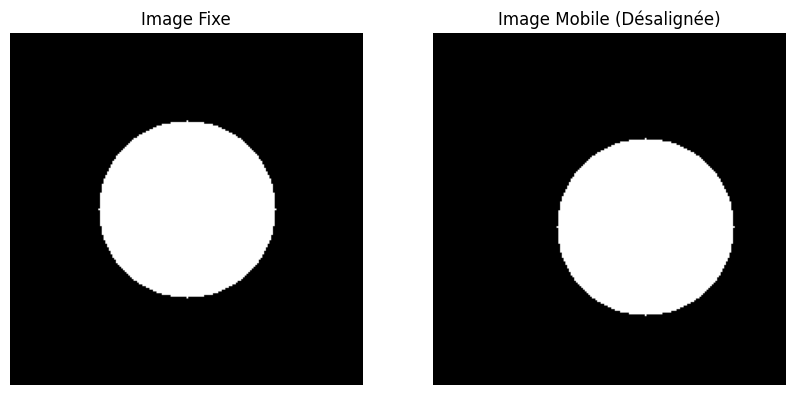

In [2]:
def creer_cercle(dimensions, centre, rayon):
    """Crée une image binaire avec un cercle."""
    x, y = np.meshgrid(np.arange(dimensions[1]), np.arange(dimensions[0]))
    distance = np.sqrt((x - centre[1])**2 + (y - centre[0])**2)
    return (distance <= rayon).astype(np.uint8)

dimensions_image = (200, 200)
rayon_cercle = 50

# Image fixe : cercle centré
centre_fixe = (100, 100)
image_fixe = creer_cercle(dimensions_image, centre_fixe, rayon_cercle)

# Image mobile : cercle décalé
centre_mobile = (110, 120)
image_mobile = creer_cercle(dimensions_image, centre_mobile, rayon_cercle)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image_fixe, cmap='gray')
axes[0].set_title("Image Fixe")
axes[0].axis('off')

axes[1].imshow(image_mobile, cmap='gray')
axes[1].set_title("Image Mobile (Désalignée)")
axes[1].axis('off')
plt.show()

---

## 2. Visualisation de la superposition

Pour visualiser le désalignement entre les deux images, nous pouvons les superposer en utilisant des canaux de couleur distincts. Par exemple, l'image fixe peut être représentée en cyan et l'image mobile en magenta.

-   Les régions uniques à l'image fixe apparaîtront en cyan.
-   Les régions uniques à l'image mobile apparaîtront en magenta.
-   Les zones de superposition (où les deux images coïncident) apparaîtront en blanc (combinaison de cyan et magenta).

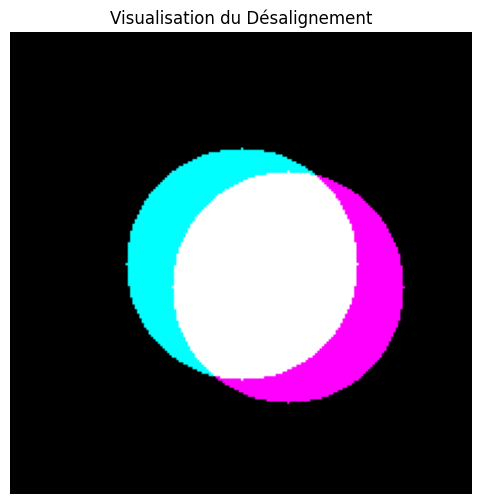

In [3]:
# Création d'une image couleur vide pour la superposition
superposition_visuelle = np.zeros((dimensions_image[0], dimensions_image[1], 3), dtype=np.uint8)

# Assignation des canaux de couleur
superposition_visuelle[image_fixe == 1, 1] = 255 # Canal Vert pour l'image fixe (contribue au cyan)
superposition_visuelle[image_fixe == 1, 2] = 255 # Canal Bleu pour l'image fixe (contribue au cyan)

superposition_visuelle[image_mobile == 1, 0] = 255 # Canal Rouge pour l'image mobile (contribue au magenta)
superposition_visuelle[image_mobile == 1, 2] = 255 # Canal Bleu pour l'image mobile (contribue au magenta)

plt.figure(figsize=(6, 6))
plt.imshow(superposition_visuelle)
plt.title("Visualisation du Désalignement")
plt.axis('off')
plt.show()

---

## 3. Mesure de la superposition : coefficient de Dice

Pour évaluer quantitativement la qualité de la superposition entre deux images binaires, le **Coefficient de Dice** est une métrique couramment utilisée.

**Formule :** `Dice = (2 * |A ∩ B|) / (|A| + |B|)`

-   `|A ∩ B|` représente la taille de l'intersection (la zone où les deux images se superposent).
-   `|A|` et `|B|` représentent les tailles (nombre de pixels actifs) de chaque image.

Le score de Dice varie de 0 (aucune superposition) à 1 (superposition parfaite).

In [4]:
def calculer_dice(image1, image2):
    """Calcule le coefficient de Dice pour deux images binaires."""
    intersection = np.sum(image1 * image2) # Nombre de pixels en commun
    total_pixels = np.sum(image1) + np.sum(image2) # Somme des pixels actifs dans chaque image
    if total_pixels == 0: # Éviter la division par zéro si les images sont vides
        return 1.0 if np.sum(image1) == 0 and np.sum(image2) == 0 else 0.0
    return 2.0 * intersection / total_pixels

dice_avant_recalage = calculer_dice(image_fixe, image_mobile)
print(f"Coefficient de Dice avant recalage : {dice_avant_recalage:.4f}")

Coefficient de Dice avant recalage : 0.7170


---

## 4. Simulation de recalage

Le recalage réel implique des algorithmes d'optimisation complexes pour trouver la transformation géométrique (translation, rotation, mise à l'échelle) qui maximise une métrique de similarité (comme le coefficient de Dice) entre les images. Pour cet exemple, nous allons simuler un recalage parfait en créant une image mobile qui est déjà parfaitement alignée avec l'image fixe.

Coefficient de Dice après recalage parfait : 1.0000


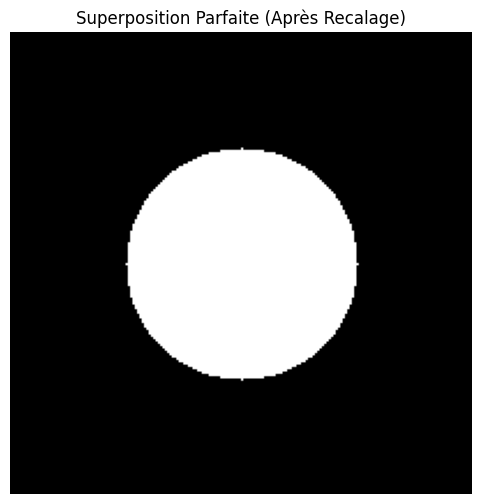

In [5]:
# L'image "recalée" est une copie de l'image fixe, simulant un alignement parfait
image_recalee = creer_cercle(dimensions_image, centre_fixe, rayon_cercle)

dice_apres_recalage = calculer_dice(image_fixe, image_recalee)
print(f"Coefficient de Dice après recalage parfait : {dice_apres_recalage:.4f}")

# Visualisation de la superposition parfaite (les deux images sont blanches là où elles se superposent)
superposition_parfaite = np.zeros((dimensions_image[0], dimensions_image[1], 3), dtype=np.uint8)
superposition_parfaite[image_recalee == 1, :] = 255 # Tous les canaux à 255 (blanc)

plt.figure(figsize=(6, 6))
plt.imshow(superposition_parfaite)
plt.title("Superposition Parfaite (Après Recalage)")
plt.axis('off')
plt.show()